In [151]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [152]:
RS = np.random.exponential(scale=1, size=1000)
LS = -np.random.exponential(scale=1, size=1000)
UN = np.random.uniform(low=0, high=1, size=1000)
a1 = np.random.normal(loc=0, scale=1, size= 500)
a2 = np.random.normal(loc=4, scale=1.5, size=500)
bimodal = np.concatenate((a1,a2))

# Right skew

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


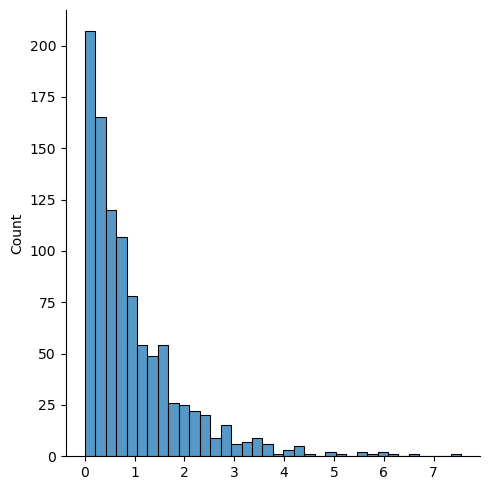

In [153]:
sns.displot(RS)

# Left skew

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


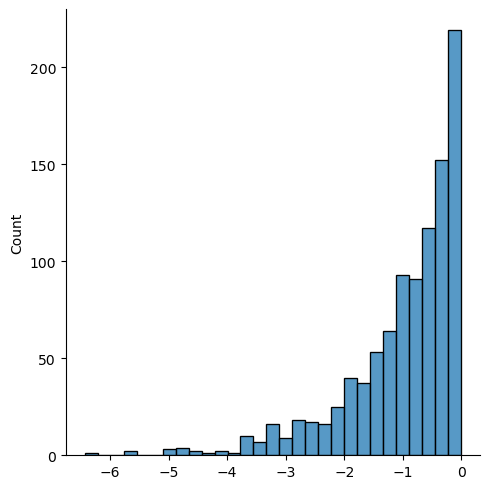

In [154]:
sns.displot(LS)

# Uniform

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


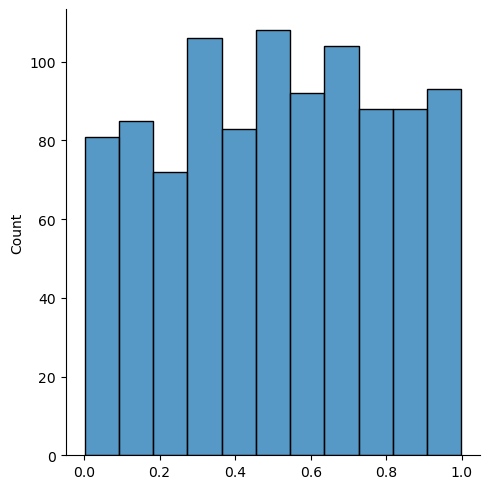

In [155]:
sns.displot(UN)

# Bimodal

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


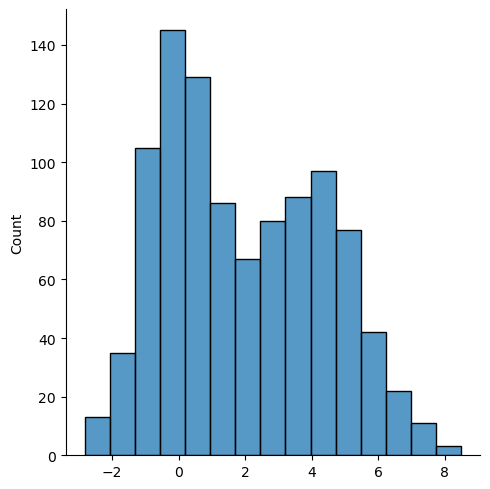

In [156]:
sns.displot(bimodal)

In [157]:
list = ["a","b","c","d"]
r = np.random.randint(0, len(list), size=1000)
CAT = np.choose(r, list)

In [158]:
print(len(RS),len(CAT),len(LS),len(UN),len(bimodal))

1000 1000 1000 1000 1000


In [207]:
df = pd.DataFrame({"Right skew" : RS,
                  "Categorical 0" : CAT,
                  "Left skew" : LS,
                   "Categorical 1" :CAT,
                   "Uniform" : UN,
                   "Categorical 2" : CAT,
                  "Bimodal":bimodal,
                  "Categorical 3": CAT})

In [208]:
df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,7.554464,b,-1.109085,b,0.393653,b,1.264104,b
1,0.657959,c,-1.092742,c,0.796113,c,-0.602171,c
2,0.525135,d,-2.350495,d,0.935680,d,-1.039546,d
3,0.581434,d,-1.449833,d,0.520695,d,-1.001672,d
4,0.695772,d,-0.170337,d,0.106073,d,-0.351733,d
...,...,...,...,...,...,...,...,...
995,0.694155,a,-0.693739,a,0.859300,a,4.887925,a
996,0.246718,a,-1.806993,a,0.822908,a,3.622145,a
997,0.783071,a,-0.105891,a,0.737597,a,3.638917,a
998,0.545890,a,-2.473716,a,0.892123,a,0.395909,a


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Right skew     1000 non-null   float64
 1   Categorical 0  1000 non-null   object 
 2   Left skew      1000 non-null   float64
 3   Categorical 1  1000 non-null   object 
 4   Uniform        1000 non-null   float64
 5   Categorical 2  1000 non-null   object 
 6   Bimodal        1000 non-null   float64
 7   Categorical 3  1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


# Normalization

- Definition: Normalization transformation means adjusting numbers so they all fit between 0 and 1, making them easier to compare.
- Formula:  Normalization = (x - xmin) / (xmax - xmin)
- Example:  we have three sets of data representing the income of individuals in three different countries:

        Country A: [25000, 30000, 35000, 40000, 45000]
        Country B: [20000, 22000, 24000, 26000, 28000]
        Country C: [3000, 4000, 5000, 6000, 7000]
  These income values are in different scales and ranges. To compare them effectively, we can normalize them using min-max scaling, which maps the original values to a new range, typically between 0 and 1.

        After min-max scaling:

        Country A: [0.00, 0.25, 0.50, 0.75, 1.00]
        Country B: [0.00, 0.25, 0.50, 0.75, 1.00]
        Country C: [0.00, 0.25, 0.50, 0.75, 1.00]
   Now, the income values for all three countries are in the same range, making it easier to compare them directly. This normalization process allows us to eliminate the effect of the original scale and focus on the relative differences in income levels between the countries.

In [162]:
def formula(x):
    return (x - x.min()) / (x.max() - x.min())

def Normalization(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

n_df = Normalization(df)
n_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,1.000000,b,0.828121,b,0.393154,b,0.360909,b
1,0.087055,c,0.830663,c,0.797302,c,0.195997,c
2,0.069472,d,0.635076,d,0.937454,d,0.157349,d
3,0.076925,d,0.775133,d,0.520729,d,0.160696,d
4,0.092061,d,0.974101,d,0.104368,d,0.218127,d
...,...,...,...,...,...,...,...,...
995,0.091847,a,0.892710,a,0.860754,a,0.681124,a
996,0.032616,a,0.719593,a,0.824209,a,0.569275,a
997,0.103617,a,0.984123,a,0.738541,a,0.570757,a
998,0.072220,a,0.615915,a,0.893715,a,0.284192,a


In [163]:
print(n_df.min())
print(n_df.max())

Right skew       0.0
Categorical 0      a
Left skew        0.0
Categorical 1      a
Uniform          0.0
Categorical 2      a
Bimodal          0.0
Categorical 3      a
dtype: object
Right skew       1.0
Categorical 0      d
Left skew        1.0
Categorical 1      d
Uniform          1.0
Categorical 2      d
Bimodal          1.0
Categorical 3      d
dtype: object


## Mean Normalized
- Definition: Mean normalization is a data preprocessing technique that adjusts values so that their mean (average) becomes zero, typically achieved by subtracting the mean value from each data point. This process centers the data around zero, aiding comparison and analysis across different datasets. 
  
  mean=0,std=1
- Formula: Mean normalization = x - xmean / xmax-xmin
- Example: mean normalization would be adjusting a set of exam scores:

    Original scores: [70, 80, 85, 90, 95]

    Calculate the mean:
    Mean = (70 + 80 + 85 + 90 + 95) / 5 = 84

    Subtract the mean from each score:
    Normalized scores = [70-84, 80-84, 85-84, 90-84, 95-84]
    = [-14, -4, 1, 6, 11]
- Now, the mean of the normalized scores is zero, and the data is centered around zero, aiding comparison and analysis across different datasets.

In [136]:
def formula(x):
    return (x - x.mean()) / (x.max()-x.min())

def Mean_Normalization(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

mn_df = Mean_Normalization(df)
mn_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,-0.060961,a,-0.300430,a,0.400579,a,-0.106622,a
1,0.154276,a,-0.016004,a,-0.266737,a,-0.322750,a
2,0.012692,d,0.127703,d,-0.310451,d,-0.169786,d
3,0.032467,a,0.136772,a,-0.171664,a,-0.145538,a
4,-0.099351,a,-0.208735,a,-0.445446,a,0.107626,a
...,...,...,...,...,...,...,...,...
995,0.430578,b,-0.009997,b,-0.058003,b,0.123059,b
996,-0.049785,a,0.058101,a,-0.345563,a,0.444068,a
997,0.111931,d,0.083587,d,0.033790,d,0.413564,d
998,-0.070178,a,0.131519,a,0.434153,a,0.352465,a


In [137]:
mn_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,3.552714e-18,5.206946e-17,-1.287859e-17,0.000000
std,1.485892e-01,1.390902e-01,2.976390e-01,0.215900
min,-1.515486e-01,-8.613958e-01,-5.023181e-01,-0.460050
25%,-1.070625e-01,-5.469541e-02,-2.635655e-01,-0.179609
50%,-4.661607e-02,3.577827e-02,6.240473e-03,-0.043971
75%,6.016809e-02,1.020068e-01,2.628029e-01,0.184569
max,8.484514e-01,1.386042e-01,4.976819e-01,0.539950


# Robust Scaling
- Definition: Robust scaling, also known as robust standardization, is a data preprocessing technique used to scale numerical features by removing the median and scaling them according to the interquartile range (IQR) instead of the mean and standard deviation. This method is robust to outliers in the data, as it focuses on the middle 50% of the data distribution, making it suitable for datasets with skewed distributions.
- Formula: x - xmedian / xQ3 - xQ1
- Example: Suppose we have a dataset representing house prices
      
     [100,150,200,250,300,1000]
       
    Robust Scaling:
         
     Median: 200
        
     Interquartile Range (IQR): 300−150=150
        
    Robustly scaled values: [100−200/150,150−200/150,200−200/150,250−200/150,300−200/150,1000−200/150] =[−1,−0.6667,0,0.3333,0.6667,6]
        
     Standard Scaling (for comparison):
        
     Mean: 350
            
    Standard Deviation: 141.42
            
    Scaled values: [100−350/141.42,150−350/141.42,200−350/141.42,250−350/141.42,300−350/141.42,1000−350/141.42]  =[−1.7678,−1.0607,−0.3536,0.3536,1.0607,5.6569]

- Robust scaling produces values that are less affected by the outlier (1000) compared to standard scaling, showing its robustness in handling outliers.

In [138]:
def formula(x):
    return (x - x.median()) / (x.quantile(0.75) - x.quantile(0.25))

def Robust_scaling(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

rs_df = Robust_scaling(df)
rs_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,-0.085781,a,-2.145523,a,0.749169,a,-0.172035,a
1,1.201286,a,-0.330448,a,-0.518605,a,-0.765501,a
2,0.354647,d,0.586620,d,-0.601653,d,-0.345478,d
3,0.472898,a,0.644495,a,-0.337985,a,-0.278894,a
4,-0.315342,a,-1.560368,a,-0.858118,a,0.416270,a
...,...,...,...,...,...,...,...,...
995,2.853509,b,-0.292115,b,-0.122050,b,0.458646,b
996,-0.018947,a,0.142455,a,-0.668359,a,1.340108,a
997,0.948075,d,0.305094,d,0.052339,d,1.256345,d
998,-0.140895,a,0.610973,a,0.812952,a,1.088573,a


In [139]:
rs_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.278753,-0.228320,-0.011856,0.120739
std,0.888529,0.887608,0.565458,0.592841
min,-0.627472,-5.725345,-0.966165,-1.142515
25%,-0.361456,-0.577361,-0.512580,-0.372451
50%,0.000000,0.000000,0.000000,0.000000
75%,0.638544,0.422639,0.487420,0.627549
max,5.352295,0.656187,0.933646,1.603389


# Standardization
- Definition: Standardization is a data preprocessing technique that adjusts numerical data to have a mean of zero and a standard deviation of one. This process makes the data easier to interpret and compare, particularly in machine learning algorithms where features with different scales can impact model performance.
- Formula: x - x.mean() / x.std()
- Example: Suppose we have a dataset representing the heights of individuals in centimeters:
    [160,165,170,175,180]
     
    After standardization:
    Calculate Mean and Standard Deviation:
    
    Mean: 160+165+170+175+180/5=1700
   
   Standard Deviation: ≈ 7.071
  
  Standardize the Heights: [160−170/7.071,165−170/7.071,170−170/7.071,175−170/7.071,180−170/7.071]≈[−0.707,−0.354,0,0.354,0.707]
- Now, the heights are standardized with a mean of zero and a standard deviation of one, making them easier to compare and analyze

In [140]:
def formula(x):
    return (x - x.mean()) / x.std()

def Standardization(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

s_df = Standardization(df)
s_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,-0.410268,a,-2.159965,a,1.345856,a,-0.493850,a
1,1.038270,a,-0.115059,a,-0.896175,a,-1.494905,a
2,0.085415,d,0.918131,d,-1.043044,d,-0.786413,d
3,0.218501,a,0.983334,a,-0.576753,a,-0.674099,a
4,-0.668628,a,-1.500716,a,-1.496597,a,0.498501,a
...,...,...,...,...,...,...,...,...
995,2.897774,b,-0.071873,b,-0.194877,b,0.569980,b
996,-0.335049,a,0.417724,a,-1.161013,a,2.056825,a
997,0.753292,d,0.600957,d,0.113527,d,1.915534,d
998,-0.472296,a,0.945567,a,1.458656,a,1.632537,a


In [141]:
s_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.953993e-17,8.881784e-18,-1.776357e-17,-5.684342e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.019916e+00,-6.193074e+00,-1.687676e+00,-2.130850e+00
25%,-7.205267e-01,-3.932370e-01,-8.855207e-01,-8.319101e-01
50%,-3.137245e-01,2.572307e-01,2.096658e-02,-2.036617e-01
75%,4.049290e-01,7.333859e-01,8.829586e-01,8.548842e-01
max,5.710047e+00,9.965063e-01,1.672099e+00,2.500926e+00


# Max absolute scaling
- Definition: Max absolute scaling is a data preprocessing technique that scales numerical features by dividing each value by the maximum absolute value in the dataset. This transformation ensures that all values are between -1 and 1, maintaining their relative proportions while eliminating the influence of outliers.
- Formula: x / |xmax|
- Example: Suppose we have a dataset representing the following values:
    
    [10,20,30,40,50]
   
   After applying max absolute scaling:
   
   Calculate the Maximum Absolute Value:
   Maximum Absolute Value: 50
   
   Scale the Values: [10/50,20/50,30/50,40/50,50/50] =[0.2,0.4,0.6,0.8,1.0]

- Now, all values are scaled between -1 and 1, maintaining their relative proportions within the dataset.

In [164]:
def formula(x):
    return x / abs(x.max())

def max_absolute_scaling(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

mas_df = max_absolute_scaling(df)
mas_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,1.000000,b,0.828121,b,0.393154,b,0.360909,b
1,0.087055,c,0.830663,c,0.797302,c,0.195997,c
2,0.069472,d,0.635076,d,0.937454,d,0.157349,d
3,0.076925,d,0.775133,d,0.520729,d,0.160696,d
4,0.092061,d,0.974101,d,0.104368,d,0.218127,d
...,...,...,...,...,...,...,...,...
995,0.091847,a,0.892710,a,0.860754,a,0.681124,a
996,0.032616,a,0.719593,a,0.824209,a,0.569275,a
997,0.103617,a,0.984123,a,0.738541,a,0.570757,a
998,0.072220,a,0.615915,a,0.893715,a,0.284192,a


In [165]:
print(mas_df.min())
print(mas_df.max())

Right skew       0.0
Categorical 0      a
Left skew        0.0
Categorical 1      a
Uniform          0.0
Categorical 2      a
Bimodal          0.0
Categorical 3      a
dtype: object
Right skew       1.0
Categorical 0      d
Left skew        1.0
Categorical 1      d
Uniform          1.0
Categorical 2      d
Bimodal          1.0
Categorical 3      d
dtype: object


# Log Transformation
- Definition: Log transformation is a mathematical operation applied to each value in a dataset, replacing it with the natural logarithm of the original value. This transformation is commonly used in data analysis to stabilize variance, make the data distribution more symmetric, and facilitate better modeling of relationships.
- Formula: y=log(x)
- Example: Original dataset: [1,2,3,4,5]
       
    Applying log transformation:
    log⁡(1)=0
    log(2)≈0.693 
    log⁡(3)≈1.099
    log(4)≈1.386 
    log⁡(5)≈1.609
    
    Transformed dataset: [0,0.693,1.099,1.386,1.609]
    
    
 - Each original value is replaced with its corresponding natural logarithm value in the transformed dataset.

In [178]:
import numpy as np

def formula(x):
    return np.log1p(x)  

def log_transformation(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

lt_df = log_transformation(df)
lt_df

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,2.146453,b,NaN,b,0.331928,b,0.817179,b
1,0.505587,c,NaN,c,0.585625,c,-0.921734,c
2,0.422083,d,NaN,d,0.660459,d,NaN,d
3,0.458332,d,NaN,d,0.419168,d,NaN,d
4,0.528138,d,-0.186735,d,0.100816,d,-0.433453,d
...,...,...,...,...,...,...,...,...
995,0.527184,a,-1.183317,a,0.620200,a,1.772904,a
996,0.220515,a,NaN,a,0.600433,a,1.530859,a
997,0.578337,a,-0.111928,a,0.552503,a,1.534481,a
998,0.435600,a,NaN,a,0.637699,a,0.333546,a


In [179]:
lt_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1000.000000,632.000000,1000.000000,914.000000
mean,0.574126,-0.771033,0.395532,0.823996
std,0.419821,0.900586,0.192854,1.050276
min,0.000333,-5.487661,0.002139,-4.955219
25%,0.234772,-1.004847,0.252761,0.259100
50%,0.501507,-0.454322,0.417876,1.131070
75%,0.846909,-0.155948,0.561044,1.634977
max,2.146453,-0.003797,0.692129,2.250932


# Root Transformations
- Definition: Root transformations involve taking the square root, cube root, or any other nth root of each value in a dataset. These transformations are used to stabilize variance, reduce skewness, and make the data distribution more symmetric, often beneficial for statistical modeling and analysis.
- Formula: y= x^(1/n)
- Example: dataset for root transformations
    
    Original dataset: [1,4,9,16,25]
    
    Square root transformation:Transformed dataset: [1,2,3,4,5]
    
    Cube root transformation:Transformed dataset:[1,1.587,2.080,2.520,2.924]
    
- These are examples of square root and cube root transformations applied to the original dataset. Each value is replaced with its corresponding square root or cube root value.
  

In [180]:
import numpy as np

def formula(x, root=2):
    return np.power(x, 1/root)

def Root_transformation(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            a[col] = formula(a[col])
    return a

rt_df = Root_transformation(df)
rt_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,1.465078,b,NaN,b,0.576132,b,0.903980,b
1,0.711047,c,NaN,c,0.765261,c,NaN,c
2,0.649679,d,NaN,d,0.812686,d,NaN,d
3,0.677002,d,NaN,d,0.647432,d,NaN,d
4,0.726731,d,NaN,d,0.317515,d,NaN,d
...,...,...,...,...,...,...,...,...
995,0.726074,a,NaN,a,0.787528,a,1.331504,a
996,0.469590,a,NaN,a,0.774876,a,1.237279,a
997,0.760485,a,NaN,a,0.743306,a,1.238742,a
998,0.660000,a,NaN,a,0.798561,a,0.577534,a


In [181]:
rt_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1000.000000,0.0,1000.000000,737.000000
mean,0.699610,NaN,0.602386,1.063628
std,0.291130,NaN,0.180818,0.310182
min,0.018244,NaN,0.046248,0.077243
25%,0.484533,NaN,0.502753,0.845516
50%,0.708172,NaN,0.646433,1.177261
75%,0.920276,NaN,0.749029,1.302044
max,1.465078,NaN,0.831943,1.500311


# Box - cox Transformation
- Definition: The Box-Cox transformation adjusts data to meet statistical assumptions by finding the best power transformation, making it more normally distributed and improving model performance.
- Formula:

    For x>0:
    
    ((x+1)^lmda - 1)/lmda if lmda !=0
                
    log(x+1) if lmda=0
    
    
- Example: Let's consider a dataset of positive numbers: [10, 20, 30, 40, 50].

    
    We want to apply the Box-Cox transformation to this dataset to make it more normally distributed. After applying the Box-Cox transformation, the transformed dataset might look like: [2.20, 3.62, 4.97, 6.25, 7.54].

    
    In this example, the Box-Cox transformation adjusted the original dataset to make it more symmetric and closer to a normal distribution, which can be beneficial for certain statistical analyses.

In [209]:
import numpy as np
import pandas as pd

def boxcox_transformation(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            for lambda_value in np.linspace(-5, 5, 1000):
                transformed = (np.power(a[col], lambda_value) - 1) / lambda_value if lambda_value != 0 else np.log(a[col])
                a[col] = transformed
                break  
    return a

bct_df = boxcox_transformation(df)
bct_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,0.199992,b,0.319181,b,-20.957407,b,0.138039,b
1,-1.421943,c,0.328363,c,-0.425399,c,2.725975,c
2,-4.808110,d,0.202788,d,-0.078865,d,0.364745,d
3,-2.809723,d,0.231221,d,-5.025307,d,0.398337,d
4,-1.026577,d,1394.925218,d,-14893.575928,d,37.350482,d
...,...,...,...,...,...,...,...,...
995,-1.040932,a,1.444659,a,-0.226881,a,0.199928,a
996,-218.588894,a,0.210381,a,-0.329998,a,0.199679,a
997,-0.479241,a,15022.301248,a,-0.716081,a,0.199687,a
998,-3.925772,a,0.202159,a,-0.153921,a,-20.361444,a


In [210]:
bct_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.900282e+13,4.494554e+08,-4.656584e+09,-2.953928e+07
std,1.546929e+15,9.093860e+09,1.406204e+11,8.378220e+08
min,-4.891820e+16,2.000181e-01,-4.443774e+12,-2.605928e+10
25%,-1.539382e+02,2.388065e-01,-1.014961e+02,1.861773e-01
50%,-1.507786e+00,1.409835e+00,-5.124994e+00,1.998197e-01
75%,1.523767e-01,1.377210e+02,-6.288871e-01,2.052301e-01
max,1.999919e-01,2.558861e+11,-2.048077e-03,1.740296e+09


# Yeo John Son Transformation
- Definition: The Yeo-Johnson transformation is a data transformation technique that adjusts the distribution of data to make it more symmetrical and conform to the assumptions of statistical tests, such as normality. It extends the Box-Cox transformation by allowing for both positive and negative values in the dataset. This transformation involves raising the data to a power determined by a parameter, which is optimized to achieve the best transformation.
- Formula: 

     for x>=0:
                ((x+1)^lmda - 1)/lmda if lmda !=0
                
    log(x+1) if lmda=0
           
     for x<0:
                 (-(-x+1)^(2-lmda) - 1)/(2-lmda) if lmda != 2
                 
     -log(-x+1)  if lmda = 2
                 
- Example: Let's consider a dataset with both positive and negative values:

    Original dataset: [-3, -2, -1, 0, 1, 2, 3]

    
    We can apply the Yeo-Johnson transformation to this dataset to make it more symmetric and conform to the assumptions of statistical tests, such as normality.

   
   After applying the Yeo-Johnson transformation, the transformed dataset might look like:

    
    Transformed dataset: [-2.350, -1.431, -0.583, 0.000, 0.583, 1.431, 2.350]

    In this example, the Yeo-Johnson transformation adjusted the original dataset to make it more symmetric and closer to a normal distribution, thereby improving its suitability for statistical analyses.

In [211]:
import numpy as np
import pandas as pd

def yeo_john_son_T(a):
    for col in a.columns:
        if a[col].dtype in ['float64', 'int32']:
            for lambda_value in np.linspace(-5, 5, 1000):
                if all(a[col] >= 0):
                    transformed = (np.power(a[col] + 1, lambda_value) - 1) / lambda_value if lambda_value != 0 else np.log(a[col] + 1)
                else:
                    transformed = (np.power(-(-a[col] + 1), 2 - lambda_value) - 1) / (2 - lambda_value) if lambda_value != 2 else -np.log(-a[col] + 1)
                a[col] = transformed
                break
    return a

yjs_df = yeo_john_son_T(df)
yjs_df

,Right skew,Categorical 0,Left skew,Categorical 1,Uniform,Categorical 2,Bimodal,Categorical 3
0,-1.728186e-01,b,0.149938,b,-3.515356e+08,b,-1.933598e-01,b
1,-6.997411e+01,c,0.151645,c,-1.850739e+00,c,6.375585e+00,c
2,-3.185282e+04,d,0.120552,d,-3.858930e-01,d,-1.488212e-01,d
3,-1.664151e+03,d,0.129311,d,-4.118679e+04,d,-1.469345e-01,d
4,-2.019882e+01,d,0.200000,d,-2.323266e+28,d,1.198045e+10,d
...,...,...,...,...,...,...,...,...
995,-2.121466e+01,a,0.197709,a,-7.406058e-01,a,-1.728353e-01,a
996,-3.517018e+15,a,0.123013,a,-1.194476e+00,a,-1.729006e-01,a
997,-2.356837e+00,a,0.200000,a,-6.404185e+00,a,-1.728987e-01,a
998,-1.005145e+04,a,0.120344,a,-5.320232e-01,a,-2.899454e+08,a


In [212]:
yjs_df.describe()

,Right skew,Left skew,Uniform,Bimodal
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03
mean,-9.576240e+112,0.171743,-4.888386e+84,-1.165842e+69
std,3.028273e+114,0.033574,1.545843e+86,3.686709e+70
min,-9.576240e+115,0.119631,-4.888386e+87,-1.165840e+72
25%,-3.062042e+14,0.131449,-1.702665e+13,-1.766334e-01
50%,-8.926813e+01,0.197539,-4.621525e+04,-1.728637e-01
75%,-1.877650e-01,0.200000,-4.489369e+00,-1.714726e-01
max,-1.728186e-01,0.200000,-2.877750e-01,6.906595e+63
